# Data Science Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

In [2]:
!ls /home/dsc/Data/challenge/

bookings.csv.bz2  searches.csv.bz2


In [3]:
!bzcat /home/dsc/Data/challenge/bookings.csv.bz2 | head -10000 > bookings_sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/bookings.csv.bz2, output file = (stdout)


In [4]:
!bzip2 -f bookings_sample.csv

In [5]:
!ls -l

total 780
-rw-rw-r-- 1 dsc dsc 535893 nov 21 00:20 bookings_sample.csv.bz2
-rw-rw-r-- 1 dsc dsc  15880 nov 21 00:20 DS_challenge.ipynb
-rw-rw-r-- 1 dsc dsc 244720 nov 20 19:18 searches_sample.csv.bz2


In [6]:
!bzcat bookings_sample.csv.bz2 | wc -l

10000


In [7]:
import bz2
with bz2.BZ2File('/home/dsc/DS/DS_challenge/bookings_sample.csv.bz2') as file_bz2:
    count = 0
    for line in file_bz2:
        count += 1
print(count)

10000


### Getting number of rows from the whole file (Chunksize)

In [8]:
chunks = pd.read_csv('/home/dsc/Data/challenge/bookings.csv.bz2',
                 compression = 'bz2',
                 sep = '^',
                 chunksize = 100000)

In [9]:
rows = 0
for chunk in chunks:
    rows += len(chunk)
print(rows)

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


10000010


# Exercise 2

In [4]:
bookings = pd.read_csv('/home/dsc/DS/DS_challenge/bookings_sample.csv.bz2', compression='bz2', sep='^')

In [5]:
bookings.shape

(9999, 38)

In [6]:
bookings.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [7]:
bookings.groupby('arr_port')['pax'].sum().sort_values(ascending=False).head(10)

arr_port
HKG         112
LGA          95
ORD          94
JFK          92
SFO          91
LAX          91
MCO          90
DCA          82
DEN          79
LHR          76
Name: pax, dtype: int64

In [8]:
bookings.loc[:, ['arr_port', 'pax']].isna().sum()

arr_port    0
pax         0
dtype: int64

In [9]:
bookings['arr_port'].value_counts()

LHR         212
LAX         202
JFK         175
ORD         175
SFO         156
CDG         151
LGA         150
MNL         129
HKG         122
PVG         122
MCO         121
IST         118
MIA         109
PHX         108
LAS         107
ATL          98
PEK          94
DEN          89
DCA          88
BOS          88
JED          88
SEA          83
DFW          83
SGN          82
DXB          80
ICN          78
TPA          73
FCO          70
BKK          69
ATH          67
           ... 
LUO           1
KGS           1
BME           1
AOE           1
BEG           1
RAI           1
BTV           1
IVL           1
IXB           1
BDA           1
FWA           1
IGU           1
FSP           1
ARH           1
YXY           1
EWN           1
CUC           1
LAO           1
VSA           1
SPS           1
NAG           1
RAJ           1
IDR           1
ERI           1
YQU           1
QOW           1
HOU           1
HFE           1
JKH           1
RST           1
Name: arr_port, Length: 

Removing white spaces from the columns

In [7]:
bookings.columns = bookings.columns.str.strip()

In [8]:
bookings.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

Unique values for "rloc" column"

In [9]:
len(bookings['rloc'].unique())

3638

### Now let's work with Chunks

In [14]:
chunk_size = 10000
df_chunk = pd.read_csv('/home/dsc/Data/challenge/bookings.csv.bz2',
                     compression = 'bz2',
                     sep = '^',
                     usecols = ['arr_port', 'pax'],
                     chunksize = chunk_size)

In [15]:
def chunk_processing(chunk):
    return chunk.dropna().groupby('arr_port')['pax'].sum()

In [16]:
chunk_list = []

for chunk in df_chunk:
    processed_chunk = chunk_processing(chunk)
    chunk_list.append(processed_chunk)
    
df_concat = pd.concat(chunk_list)

In [17]:
top_10 = df_concat.groupby('arr_port').sum().sort_values(ascending=False).head(10)

In [18]:
top_10

arr_port
LHR         88809.0
MCO         70930.0
LAX         70530.0
LAS         69630.0
JFK         66270.0
CDG         64490.0
BKK         59460.0
MIA         58150.0
SFO         58000.0
DXB         55590.0
Name: pax, dtype: float64

In [23]:
top_10 = top_10.reset_index()

In [24]:
top_10

,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAX,70530.0
3,LAS,69630.0
4,JFK,66270.0
5,CDG,64490.0
6,BKK,59460.0
7,MIA,58150.0
8,SFO,58000.0
9,DXB,55590.0


And... Eventually I got it!! <br>
Now let's save it into a .csv and commit the new changes

In [27]:
top_10.to_csv('002_out.csv')

# Exercise 3

Creating a useless sample

In [7]:
!bzcat /home/dsc/Data/challenge/searches.csv.bz2 | head -10000 > searches_sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/searches.csv.bz2, output file = (stdout)


In [8]:
!bzip2 -f searches_sample.csv

In [9]:
!ls -l

total 824
-rw-rw-r-- 1 dsc dsc    204 nov 21 09:08 002_out.csv
-rw-rw-r-- 1 dsc dsc 535893 nov 21 00:20 bookings_sample.csv.bz2
-rw-rw-r-- 1 dsc dsc  55854 nov 21 11:47 DS_challenge.ipynb
-rw-rw-r-- 1 dsc dsc 244720 nov 21 11:48 searches_sample.csv.bz2


In [10]:
searches = pd.read_csv('searches_sample.csv.bz2', compression='bz2', sep='^')

In [11]:
searches.shape

(9999, 45)

Getting useful dates from the DF

In [12]:
searches['Date'] = pd.to_datetime(searches['Date'], format='%Y-%m-%d')

In [13]:
searches['Month_name'] = searches['Date'].dt.month_name()
searches['Year'] = searches['Date'].dt.year
searches['Month'] = searches['Date'].dt.month
searches['Day'] = searches['Date'].dt.day

Is there any NaN values in "Destination" column?

In [14]:
searches['Destination'].isna().sum()

0

Airport codes:

- Madrid: MAD
- Barcelona: BCN
- Málaga: AGP

In [15]:
# Filtering from sample 
airports = searches[(searches['Destination'] == 'MAD') | (searches['Destination'] == 'BCN') | (searches['Destination'] == 'AGP')]

In [16]:
cities = airports.groupby('Destination')['Day'].value_counts().sort_index()
cities

Destination  Day
AGP          1       7
             2       4
             3       5
             4       5
             5       4
             6       4
             7       1
             8       5
             9       6
             10      7
BCN          1      26
             2       9
             3      13
             4      18
             5      13
             6      15
             7      14
             8      18
             9      18
             10     18
MAD          1      11
             2      11
             3       5
             4      14
             5      16
             6      10
             7      13
             8      13
             9      19
             10     13
Name: Day, dtype: int64

In [17]:
cities = pd.DataFrame(cities)
type(cities)

pandas.core.frame.DataFrame

In [18]:
cities.columns = ['searches']
cities.reset_index(inplace=True)
cities.head()

,Destination,Day,searches
0,AGP,1,7
1,AGP,2,4
2,AGP,3,5
3,AGP,4,5
4,AGP,5,4


In [19]:
#x_data for plotting
cities['Day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [20]:
#y_data for plotting
cities[cities['Destination'] == 'AGP'].groupby('Day')['searches'].sum()

Day
1     7
2     4
3     5
4     5
5     4
6     4
7     1
8     5
9     6
10    7
Name: searches, dtype: int64

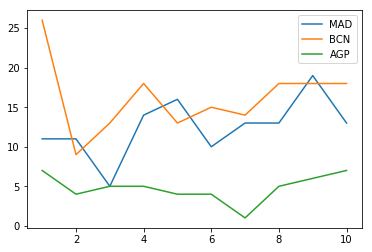

In [21]:
arr_ports = ['MAD', 'BCN', 'AGP']
x_data = cities['Day'].unique()

fig, ax = plt.subplots()

for port in arr_ports:
    y_data = cities[cities['Destination'] == port].groupby('Day')['searches'].sum()
    ax.plot(x_data, y_data, label=port)

ax.legend()

Now let's do it seriously

In [2]:
df_chunk = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',
                       compression = 'bz2',
                       sep = '^',
                       usecols = ['Destination', 'Date'],
                       chunksize = 100000)

In [3]:
def to_date(chunk):
    chunk['Date'] = pd.to_datetime(chunk['Date'], format='%Y-%m-%d')
    chunk['Year'] = chunk['Date'].dt.year
    chunk['Month'] = chunk['Date'].dt.month
    return chunk

In [4]:
def processing_chunk(chunk):
    airports = chunk[(chunk['Destination'] == 'MAD') | (chunk['Destination'] == 'BCN') | (chunk['Destination'] == 'AGP')]
    cities = airports.groupby('Destination')['Month'].value_counts().sort_index()
    cities = pd.DataFrame(cities)
    cities.columns = ['searches']
    cities.reset_index(inplace=True)
    return cities

In [25]:
test = pd.DataFrame(columns = ['Destination', 'Date'])


,Destination,Date


In [5]:
chunk_list = []
k = 0

for chunk in df_chunk:
    dated_chunk = to_date(chunk)
    processed_chunk = processing_chunk(dated_chunk)
    
    chunk_list.append(processed_chunk)
    
    if k == 2:
        break
    k += 1

df_concat = pd.concat(chunk_list)
df_concat.dtypes

Destination    object
Month           int64
searches        int64
dtype: object

In [6]:
df_concat.head()

,Destination,Month,searches
0,AGP,1,169
1,AGP,2,147
2,AGP,3,187
3,AGP,4,31
4,BCN,1,517


In [7]:
mad = df_concat[df_concat['Destination'] == 'MAD']
bcn = df_concat[df_concat['Destination'] == 'BCN']
agp = df_concat[df_concat['Destination'] == 'AGP']

In [8]:
bcn.groupby('Month')['searches'].sum()

Month
1     517
2     497
3     536
4     548
5     504
6     465
7     513
8     475
9     411
10    308
Name: searches, dtype: int64

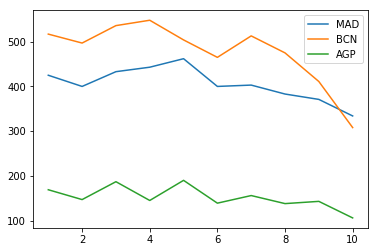

In [9]:
dest_ports = ['MAD', 'BCN', 'AGP']
x_data = df_concat['Month'].unique()

fig, ax = plt.subplots()

for port in dest_ports:
    
    city = df_concat[df_concat['Destination'] == port]
    y_data = city.groupby('Month')['searches'].sum().values
    ax.plot(x_data, y_data, label=port)

ax.legend()